## 02. 사이킷런으로 시작하는 머신러닝

### 첫 번째 머신러닝 만들어 보기 - 붓꽃 품종 예측하기

In [1]:
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

import pandas as pd

# 붓꽃 데이터 세트 로딩
iris = load_iris()

# iris.data는 붓꽃 데이터 세트에서 피처(feature)만으로 된 데이터를 numpy로 가지고 있음.
iris_data = iris.data

# iris.target은 붓꽃 데이터 세트에서 레이블(feature)만으로 된 데이터를 numpy로 가지고 있음.
iris_label = iris.target

print('iris_data 값 : {}'.format(iris_data))
print('iris_label 값 : {}'.format(iris_label))
print('iris_label 명 : {}'.format(iris.target_names))

# 데이터를 자세히 보기 위해 DataFrame으로 변환
iris_df = pd.DataFrame(iris_data, columns = iris.feature_names)
iris_df['target'] = iris_label

print(iris_df.head())

# 데이터 세트를 학습용 데이터와 테스트용 데이터로 분할
# test_size = 0.2 => 학습용 데이터 80%, 테스트 데이터 20%
# random_state => 수행할 때마다 동일한 데이터 세트로 분리하기 위해 설정
X_train, X_test, y_train, y_test = train_test_split(iris_data, iris_label, test_size = 0.3, random_state=42)

# 모델 객체 생성
dt_clf = DecisionTreeClassifier(random_state=42)

# 모델 학습
dt_clf.fit(X_train, y_train)

# 학습이 완료된 모델에서 테스트 데이터로 추론
pred = dt_clf.predict(X_test)

# 예측 결과의 성능평가 (정확도)
print('예측 정확도 {0:.4f}'.format(accuracy_score(y_test, pred)))

iris_data 값 : [[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]
 [5.4 3.9 1.7 0.4]
 [4.6 3.4 1.4 0.3]
 [5.  3.4 1.5 0.2]
 [4.4 2.9 1.4 0.2]
 [4.9 3.1 1.5 0.1]
 [5.4 3.7 1.5 0.2]
 [4.8 3.4 1.6 0.2]
 [4.8 3.  1.4 0.1]
 [4.3 3.  1.1 0.1]
 [5.8 4.  1.2 0.2]
 [5.7 4.4 1.5 0.4]
 [5.4 3.9 1.3 0.4]
 [5.1 3.5 1.4 0.3]
 [5.7 3.8 1.7 0.3]
 [5.1 3.8 1.5 0.3]
 [5.4 3.4 1.7 0.2]
 [5.1 3.7 1.5 0.4]
 [4.6 3.6 1.  0.2]
 [5.1 3.3 1.7 0.5]
 [4.8 3.4 1.9 0.2]
 [5.  3.  1.6 0.2]
 [5.  3.4 1.6 0.4]
 [5.2 3.5 1.5 0.2]
 [5.2 3.4 1.4 0.2]
 [4.7 3.2 1.6 0.2]
 [4.8 3.1 1.6 0.2]
 [5.4 3.4 1.5 0.4]
 [5.2 4.1 1.5 0.1]
 [5.5 4.2 1.4 0.2]
 [4.9 3.1 1.5 0.2]
 [5.  3.2 1.2 0.2]
 [5.5 3.5 1.3 0.2]
 [4.9 3.6 1.4 0.1]
 [4.4 3.  1.3 0.2]
 [5.1 3.4 1.5 0.2]
 [5.  3.5 1.3 0.3]
 [4.5 2.3 1.3 0.3]
 [4.4 3.2 1.3 0.2]
 [5.  3.5 1.6 0.6]
 [5.1 3.8 1.9 0.4]
 [4.8 3.  1.4 0.3]
 [5.1 3.8 1.6 0.2]
 [4.6 3.2 1.4 0.2]
 [5.3 3.7 1.5 0.2]
 [5.  3.3 1.4 0.2]
 [7.  3.2 4.7 1.4]
 [6.4 3.2 4.5 1.5

#### 교차 검증

고정된 학습 데이터와 테스트 데이터로 평가를 하다보면 테스트 데이터에만 최적의 성능을 발휘할 수 있도록 편향되게 모델을 유도하는 경향이 생기게 된다.  이러한 문제점을 개선하기 위해 교차 검증을 이용해 학습과 평가를 수행한다. 학습 데이터 세트와 검증 데이터 세트를 이용해 학습과 평가를 수행하고, 평과 결과에 따라서 하이퍼 파라미터 튜닝등의 모델 최적화를 더욱 손쉽게 할 수 있음. 대부분의  ML 모델의 성능 평가는 교차 검증을 통해 1차 평가를 하고, 최종적으로 테스트 데이터 세트를 적용해 평가하는 프로세스.

#### K 폴드 교차 검증

K개의 데이터 폴드 세트를 만들어서 K번 만큼 각 폴드 세트에 학습과 검증 평가를 반본적으로 수행하는 방법

In [7]:
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import KFold

import numpy as np

iris = load_iris()
iris_data = iris.data
iris_label = iris.target

dtClf = DecisionTreeClassifier(random_state=42)

kfold = KFold(n_splits=5)

cv_accuracy = []

n_iter = 0

# KFold 객체의 split()를 호출하면 폴드 별 학습용, 검증용 테스트의 로우 인덱스를 array로 반환
for train_idx, test_idx in kfold.split(iris_data):
    X_train, X_test = iris_data[train_idx], iris_data[test_idx]
    y_train, y_test = iris_label[train_idx], iris_label[test_idx]
    
    #학습 및 추론
    dtClf.fit(X_train, y_train)
    pred = dtClf.predict(X_test)
    
    accuracy = np.round(accuracy_score(y_test, pred), 4)
    cv_accuracy.append(accuracy)
    
    print('{} 교차검증 정확도 : {}'.format(n_iter, accuracy))
    n_iter += 1

print('평균 검증 정확도 : {0:.4f}'.format(np.mean(cv_accuracy)) )

0 교차검증 정확도 : 1.0
1 교차검증 정확도 : 1.0
2 교차검증 정확도 : 0.8333
3 교차검증 정확도 : 0.9333
4 교차검증 정확도 : 0.8
평균 검증 정확도 : 0.9133


#### Stratified K 폴드

불균형한 분포도를 가진 레이블 데이터 집합을 위한 K 폴드 방식

In [12]:
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import StratifiedKFold

import numpy as np

iris = load_iris()
iris_data = iris.data
iris_label = iris.target

dtClf = DecisionTreeClassifier(random_state=42)

skfold = StratifiedKFold(n_splits=3)

cv_accuracy = []

n_iter = 0

# KFold 객체의 split()를 호출하면 폴드 별 학습용, 검증용 테스트의 로우 인덱스를 array로 반환
for train_idx, test_idx in skfold.split(iris_data, iris_label):
    X_train, X_test = iris_data[train_idx], iris_data[test_idx]
    y_train, y_test = iris_label[train_idx], iris_label[test_idx]
    
    #학습 및 추론
    dtClf.fit(X_train, y_train)
    pred = dtClf.predict(X_test)
    
    accuracy = np.round(accuracy_score(y_test, pred), 4)
    cv_accuracy.append(accuracy)
    
    print('{0} 교차검증 정확도 : {1:.4f}'.format(n_iter, accuracy))
    n_iter += 1

print('평균 검증 정확도 : {0:.4f}'.format(np.mean(cv_accuracy)) )

0 교차검증 정확도 : 0.9800
1 교차검증 정확도 : 0.9400
2 교차검증 정확도 : 0.9600
평균 검증 정확도 : 0.9600


#### 교차검증을 간단한게 - cross_val_score

In [17]:
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score

import numpy as np

iris = load_iris()
iris_data = iris.data
iris_label = iris.target

dtClf = DecisionTreeClassifier(random_state=42)

scores = cross_val_score(dtClf, iris_data, iris_label, scoring='accuracy', cv = 3)

print('교차 검증별 정확도 : ', np.round(scores, 4))
print('평균 검증 정확도 : {0:.4f}'.format(np.mean(scores)) )

교차 검증별 정확도 :  [0.98 0.94 0.96]
평균 검증 정확도 : 0.9600


#### 교차검증과 최적 하이퍼 파라미터 튜닝을 한번에 - GridSearchCV

In [29]:
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split

import pandas as pd
import numpy as np

iris = load_iris()
iris_data = iris.data
iris_label = iris.target

dtClf = DecisionTreeClassifier(random_state=42)

grid_parameters = {
    'max_depth' : [1, 2, 3],
    'min_samples_split' : [2, 3]
}

X_train, X_test, y_train, y_test = train_test_split(iris_data, iris_label, test_size=0.2)

grid_tree = GridSearchCV(dtClf, param_grid=grid_parameters, cv = 3, refit=True)

grid_tree.fit(X_train, y_train)

scores_df = pd.DataFrame(grid_tree.cv_results_)
scores_df[['params','split0_test_score','split1_test_score','split2_test_score','mean_test_score','std_test_score','rank_test_score']]

,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score
0,"{'max_depth': 1, 'min_samples_split': 2}",0.7,0.675,0.675,0.683333,0.011785,5
1,"{'max_depth': 1, 'min_samples_split': 3}",0.7,0.675,0.675,0.683333,0.011785,5
2,"{'max_depth': 2, 'min_samples_split': 2}",1.0,0.900,0.900,0.933333,0.047140,3
3,"{'max_depth': 2, 'min_samples_split': 3}",1.0,0.900,0.900,0.933333,0.047140,3
4,"{'max_depth': 3, 'min_samples_split': 2}",1.0,0.925,0.950,0.958333,0.031180,1
5,"{'max_depth': 3, 'min_samples_split': 3}",1.0,0.925,0.950,0.958333,0.031180,1


In [30]:
print('최고 정확도 : ',grid_tree.best_score_)
print('최적 파라미터 : ',grid_tree.best_params_)

최고 정확도 :  0.9583333333333334
최적 파라미터 :  {'max_depth': 3, 'min_samples_split': 2}


In [32]:
best_estimator = grid_tree.best_estimator_

pred = best_estimator.predict(X_test)
print('예측 정확도 {0:.4f}'.format(accuracy_score(y_test, pred)))

예측 정확도 0.9333


### 데이터 전처리

#### 레이블 인코딩

카테고리 피처를 코드형 숫자값으로 변환하는 것.

In [35]:
from sklearn.preprocessing import LabelEncoder

items = ['TV', '냉장고', '컴퓨터', '선풍기', '선풍기', '믹서', '믹서']

labelEncoder = LabelEncoder()
labelEncoder.fit(items)
label = labelEncoder.transform(items)

print('인코딩 변환값 : ', label)

print('인코딩 클래스 : ', labelEncoder.classes_)

print('디코딩 원본값 : ', labelEncoder.inverse_transform([2, 3, 3, 1, 0, 4]))

인코딩 변환값 :  [0 1 4 3 3 2 2]
인코딩 클래스 :  ['TV' '냉장고' '믹서' '선풍기' '컴퓨터']
디코딩 원본값 :  ['믹서' '선풍기' '선풍기' '냉장고' 'TV' '컴퓨터']


레이블 인코딩이 일괄적인 숫자 값으로 변환이 되면서 몇몇 ML 알고리즘에 이를 적용할 경우 예측 성능이 떨어지는 경우가 발생할 수 있음.
숫자 값의 크고 작음에 대한 특성이 작용해서, 가중치가 더 부여되거나 중요하게 인식할 가능성이 발생.
선형회귀와 같은 ML 알고리즘에는 적용하지 않아여 하며, 트리 계열의 알고리즘은 이러한 특성을 반영하지 않으므로 별문제가 없음.

#### 원-핫 인코딩

피처 값의 유형에 따라 새로운 피처를 추가해 고유 값에 해당하는 칼럼에만 1을 표시하고 나머지 칼럼에는 0을 표시하는 방식 => Dense vector

In [39]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder
import numpy as np

items = ['TV', '냉장고', '전자레인지', '컴퓨터', '선풍기', '선풍기', '믹서', '믹서']

labelEncoder = LabelEncoder()
labelEncoder.fit(items)
labels = labelEncoder.transform(items)
print('라벨 인코딩 : ',labels)

# 2차원으로 데이터 변환
labels = labels.reshape(-1, 1)

ohEncoder = OneHotEncoder()
ohEncoder.fit(labels)
oh_labels = ohEncoder.transform(labels)

print('원-핫 인코딩 : ', oh_labels.toarray())
print('변환된 원-핫 인코딩 차원 : ', oh_labels.shape)


라벨 인코딩 :  [0 1 4 5 3 3 2 2]
원-핫 인코딩 :  [[1. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 0. 1.]
 [0. 0. 0. 1. 0. 0.]
 [0. 0. 0. 1. 0. 0.]
 [0. 0. 1. 0. 0. 0.]
 [0. 0. 1. 0. 0. 0.]]
변환된 원-핫 인코딩 차원 :  (8, 6)


pandas의 API를 이용하면 더 쉽게 변환 할 수 있다.

In [43]:
import pandas as pd

df = pd.DataFrame({'item':['TV','냉장고','전자레인지','컴퓨터','선풍기','선풍기','믹서','믹서']})

print('원본 데이터프레임 : ', df)
pd.get_dummies(df)

원본 데이터프레임 :      item
0     TV
1    냉장고
2  전자레인지
3    컴퓨터
4    선풍기
5    선풍기
6     믹서
7     믹서


,item_TV,item_냉장고,item_믹서,item_선풍기,item_전자레인지,item_컴퓨터
0,1,0,0,0,0,0
1,0,1,0,0,0,0
2,0,0,0,0,1,0
3,0,0,0,0,0,1
4,0,0,0,1,0,0
5,0,0,0,1,0,0
6,0,0,1,0,0,0
7,0,0,1,0,0,0


#### 피처 스케일링과 정규화

서로 다른 변수의 값 범위를 일정한 수준으로 맞추는 작업을 피처 스케일링이라고 한다.<br>
대표적으로 표준화와 정규화가 있다.

#### StandardScaler

StandardScaler는 표준화를 쉽게 지원하기 위한 클래스.
개별 피처를 평균을 0, 분산이 1인 값으로 변환 => 가우시안 정규 분포를 가진 값

In [55]:
from sklearn.datasets import load_iris
from sklearn.preprocessing import StandardScaler
import pandas as pd

iris = load_iris()
iris_data = iris.data
iris_label = iris.target

iris_df = pd.DataFrame(iris_data, columns = iris.feature_names)
iris_df['species'] = iris_label

print('feature들의 평균')
print(iris_df.iloc[:, :4].mean())

print('feature들의 분산')
print(iris_df.iloc[:, :4].var())

# StandardScaler 객체 생성
stScaler = StandardScaler()
stScaler.fit(iris_df.iloc[:, :4])
iris_df.iloc[:, :4] = stScaler.transform(iris_df.iloc[:, :4])

print('표준화된 feature들의 평균')
print(iris_df.iloc[:, :4].mean())

print('표준화된 feature들의 분산')
print(iris_df.iloc[:, :4].var())

feature들의 평균
sepal length (cm)    5.843333
sepal width (cm)     3.057333
petal length (cm)    3.758000
petal width (cm)     1.199333
dtype: float64
feature들의 분산
sepal length (cm)    0.685694
sepal width (cm)     0.189979
petal length (cm)    3.116278
petal width (cm)     0.581006
dtype: float64
표준화된 feature들의 평균
sepal length (cm)   -1.690315e-15
sepal width (cm)    -1.842970e-15
petal length (cm)   -1.698641e-15
petal width (cm)    -1.409243e-15
dtype: float64
표준화된 feature들의 분산
sepal length (cm)    1.006711
sepal width (cm)     1.006711
petal length (cm)    1.006711
petal width (cm)     1.006711
dtype: float64


#### MinMaxScaler

MinMaxScaler는 데이터값을 0과 1사이의 범위 값으로 변환.(음수값이 있으면 -1 ~ 1값으로 변환)<br>
데이터의 분포가 가우시안 분포가 아니면 적용해 볼 수 있음.

In [58]:
from sklearn.datasets import load_iris
from sklearn.preprocessing import MinMaxScaler
import pandas as pd

iris = load_iris()
iris_data = iris.data
iris_label = iris.target

iris_df = pd.DataFrame(iris_data, columns = iris.feature_names)
iris_df['species'] = iris_label

print('feature들의 최소값')
print(iris_df.iloc[:, :4].min())

print('feature들의 최대값')
print(iris_df.iloc[:, :4].max())

# MinMaxScaler 객체 생성
mmScaler = MinMaxScaler()
# 데이터 변환을 하기 위한 기준 정보 설정
mmScaler.fit(iris_df.iloc[:, :4])
# 설정된 정보를 가지고 데이터 변환
iris_df.iloc[:, :4] = mmScaler.transform(iris_df.iloc[:, :4])

print('표준화된 feature들의 최소값')
print(iris_df.iloc[:, :4].min())

print('표준화된 feature들의 최대값')
print(iris_df.iloc[:, :4].max())

feature들의 최소값
sepal length (cm)    4.3
sepal width (cm)     2.0
petal length (cm)    1.0
petal width (cm)     0.1
dtype: float64
feature들의 최대값
sepal length (cm)    7.9
sepal width (cm)     4.4
petal length (cm)    6.9
petal width (cm)     2.5
dtype: float64
표준화된 feature들의 최소값
sepal length (cm)    0.0
sepal width (cm)     0.0
petal length (cm)    0.0
petal width (cm)     0.0
dtype: float64
표준화된 feature들의 최대값
sepal length (cm)    1.0
sepal width (cm)     1.0
petal length (cm)    1.0
petal width (cm)     1.0
dtype: float64


### 사이킷런으로 수행하는 타이타닉 생존자 예측

In [59]:
import pandas as pd

train_df = pd.read_csv('./data/titanic/train.csv')
train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [60]:
print(' 학습 데이터 정보')
train_df.info()

 학습 데이터 정보
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


사이킷런 머신러닝 알고리즘은 Null값을 허용하지 않으므로 어떻게 처리할지 결정해야 함.<br>
DataFrame의 fillna() 함수를 이용해 결측값을 처리<br>
Age의 경우 평균나이, Cabin은 'N', Embarked는 'N'

In [61]:
train_df.Age.fillna(train_df.Age.mean(), inplace=True)
train_df.Cabin.fillna('N', inplace=True)
train_df.Embarked.fillna('N', inplace=True)

In [62]:
print('데이터 세트 Null 값 개수 : ', train_df.isnull().sum())

데이터 세트 Null 값 개수 :  PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       0
dtype: int64


남아있는 문자열 피처값들의 분류

In [68]:
print('Sex 값 분포 : \n', train_df.Sex.value_counts())
print('\nCabin 값 분포 : \n', train_df.Cabin.value_counts())
print('\nEmbarked 값 분포 : \n', train_df.Embarked.value_counts())

Sex 값 분포 : 
 male      577
female    314
Name: Sex, dtype: int64

Cabin 값 분포 : 
 N              687
B96 B98          4
G6               4
C23 C25 C27      4
D                3
              ... 
A10              1
A6               1
A32              1
C70              1
C111             1
Name: Cabin, Length: 148, dtype: int64

Embarked 값 분포 : 
 S    644
C    168
Q     77
N      2
Name: Embarked, dtype: int64


Cabin(선실)의 경우 N이 가장 많은 것도 특이하지만, 속성값이 제대로 정리가 되지 않은 것 같다.<br>
선실 등급을 나타내는 첫번째 알파벳이 중요해 보여 앞 문자만 추출

In [71]:
train_df.Cabin = train_df.Cabin.str[:1]
print(train_df.Cabin[:3])

0    N
1    C
2    N
Name: Cabin, dtype: object


성별에 따른 생존 확률

In [72]:
train_df.groupby(['Sex', 'Survived'])['Survived'].count()

Sex     Survived
female  0            81
        1           233
male    0           468
        1           109
Name: Survived, dtype: int64

<AxesSubplot:xlabel='Sex', ylabel='Survived'>

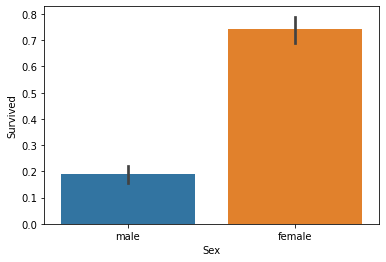

In [73]:
import seaborn as sns

sns.barplot(x = 'Sex', y = 'Survived', data = train_df)

객실과 성별에 따른 생존 확률

<AxesSubplot:xlabel='Pclass', ylabel='Survived'>

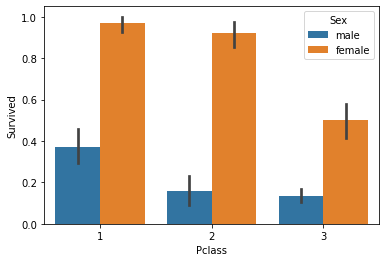

In [75]:
sns.barplot(x = 'Pclass', y = 'Survived', hue = 'Sex', data = train_df)

나이에 따른 생존 확률
나이의 경우 값 종류가 많기 때문에 범위별로 분류해 카테고리 값을 할당

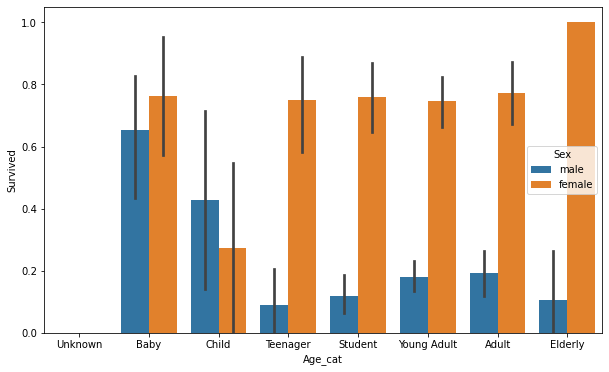

In [86]:
import matplotlib.pyplot as plt

def get_category(age):
    cat = ''
    if age <= -1: cat = 'Unknown'
    elif age <= 5: cat = 'Baby'
    elif age <= 12: cat = 'Child'
    elif age <= 18: cat = 'Teenager'
    elif age <= 25: cat = 'Student'
    elif age <= 35: cat = 'Young Adult'
    elif age <= 60: cat = 'Adult'
    else: cat = 'Elderly'
    
    return cat

plt.figure(figsize = (10, 6))

group_names = ['Unknown', 'Baby', 'Child', 'Teenager', 'Student', 'Young Adult', 'Adult', 'Elderly']

train_df['Age_cat'] = train_df.Age.apply(lambda x : get_category(x))
sns.barplot(x = 'Age_cat', y = 'Survived', hue = 'Sex', data = train_df, order=group_names)
train_df.drop('Age_cat', axis=1, inplace=True)

남아있는 문자열 카테고리를 숫자형으로 인코딩

In [87]:
from sklearn.preprocessing import LabelEncoder

def encode_features(df):
    features = ['Sex', 'Cabin', 'Embarked']
    for feature in features:
        labelEncoder = LabelEncoder()
        labelEncoder.fit(df[feature])
        df[feature] = labelEncoder.transform(df[feature])
    return df

train_df = encode_features(train_df)
train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,A/5 21171,7.2500,7,3
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,PC 17599,71.2833,2,0
2,3,1,3,"Heikkinen, Miss. Laina",0,26.0,0,0,STON/O2. 3101282,7.9250,7,3
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,113803,53.1000,2,3
4,5,0,3,"Allen, Mr. William Henry",1,35.0,0,0,373450,8.0500,7,3


In [88]:
def drop_features(df):
    df.drop(['PassengerId', 'Name', 'Ticket'], axis=1, inplace=True)
    return df

train_df = drop_features(train_df)
train_df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
0,0,3,1,22.0,1,0,7.2500,7,3
1,1,1,0,38.0,1,0,71.2833,2,0
2,1,3,0,26.0,0,0,7.9250,7,3
3,1,1,0,35.0,1,0,53.1000,2,3
4,0,3,1,35.0,0,0,8.0500,7,3


In [89]:
y_train_df = train_df['Survived']
X_train_df = train_df.drop('Survived', axis=1)

In [90]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_train_df, y_train_df, test_size=0.2)

In [92]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

dt_clf = DecisionTreeClassifier(random_state=42)
rf_clf = RandomForestClassifier(random_state=42)
lr_clf = LogisticRegression()

dt_clf.fit(X_train, y_train)
y_pred = dt_clf.predict(X_test)
print('DecisionTreeClassifier 정확도 : {0:.4f}'.format(accuracy_score(y_test, y_pred)))

rf_clf.fit(X_train, y_train)
y_pred = rf_clf.predict(X_test)
print('RandomForestClassifier 정확도 : {0:.4f}'.format(accuracy_score(y_test, y_pred)))

lr_clf.fit(X_train, y_train)
y_pred = lr_clf.predict(X_test)
print('LogisticRegression 정확도 : {0:.4f}'.format(accuracy_score(y_test, y_pred)))


DecisionTreeClassifier 정확도 : 0.7989
RandomForestClassifier 정확도 : 0.8212
LogisticRegression 정확도 : 0.8380


C:\Users\jysul\AppData\Roaming\Python\Python38\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [93]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(dt_clf, X_train, y_train, scoring='accuracy', cv=5)

for iter_count, accuracy in enumerate(scores):
    print('교차검증{0} 정확도 : {1:.4f}'.format(iter_count, accuracy))
    
print('교차검층 평균 정확도 : {0:.4f}'.format(np.mean(scores)))

교차검증0 정확도 : 0.7692
교차검증1 정확도 : 0.7762
교차검증2 정확도 : 0.7465
교차검증3 정확도 : 0.7958
교차검증4 정확도 : 0.7535
교차검층 평균 정확도 : 0.7682


In [95]:
from sklearn.model_selection import GridSearchCV

paramters = {'max_depth':[2,3,5,10], 'min_samples_split':[2,3,5], 'min_samples_leaf':[1,5,8]}

grid_clf = GridSearchCV(dt_clf, param_grid=paramters, scoring='accuracy', cv=5)
grid_clf.fit(X_train, y_train)

print('최적 하이퍼 파라미터 : ',grid_clf.best_params_)
print('최고 정확도 {0:.4f}: '.format(grid_clf.best_score_))

best_clf = grid_clf.best_estimator_

y_pred = best_clf.predict(X_test)

print('GridSearchCV 정확도 : {0:.4f}'.format(accuracy_score(y_test, y_pred)))

최적 하이퍼 파라미터 :  {'max_depth': 10, 'min_samples_leaf': 8, 'min_samples_split': 2}
최고 정확도 0.8077: 
GridSearchCV 정확도 : 0.7933
